In [2]:
import tensorflow as tf 

# Loading - MNIST Data Set 
## Containing Training Samples - 60,000  , Testing Samples - 10,000
### Tensorflow already contain MNIST data set which can be loaded using keras

In [3]:
mnist = tf.keras.datasets.mnist 

#  After loading MNIST dataset dividing it into train set and test set

In [4]:
## unpacking the dataset into train and test datasets
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [5]:
x_train.shape

(60000, 28, 28)

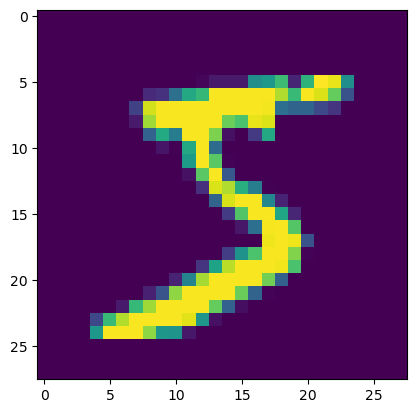

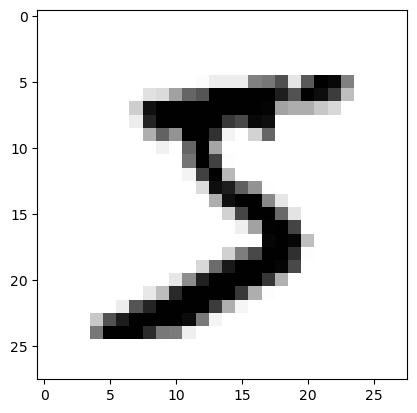

In [6]:
## just check the graph, how data looks like
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()  ##to execute the graph

plt.imshow(x_train[0], cmap = plt.cm.binary)

## Before checking the values of each pixel
## Before Normalization

In [7]:
print (x_train[0])  ### before normalization

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

## As image are in Gray level (1 channel ==> 0 to 255), not Coloured (RGB)

# Normalizing the data | Pre-Processing Step

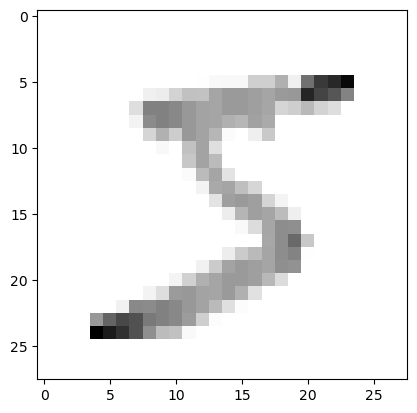

In [8]:
# normalizing 
x_train = tf.keras.utils.normalize (x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis=1)
plt.imshow(x_train[0], cmap = plt.cm.binary)

#      AFTER NORMALIZING 

In [9]:

##to check normalized values
print(x_train[0]) 

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [10]:
#to check wheather we have labels inside our code or not
print (y_train[0])

5


## Resizing image to make it suitable for applying Convolution operation 


In [11]:
import numpy as np
IMG_SIZE = 28
## increasing one dimension for kernal operation 
x_trainr = np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
x_testr = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
print("Training Samples dimension", x_trainr.shape)
print("Testing Samples dimension", x_testr.shape)

Training Samples dimension (60000, 28, 28, 1)
Testing Samples dimension (10000, 28, 28, 1)


# Creating a Deep Neural Network
### Training on 60,000 samples of MNIST handwritten dataset

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [15]:
model = Sequential()

###### FIRST CONVOLUTION LAYER 
model.add(Conv2D(64, (3,3), input_shape = x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

###### SECOND CONVOLUTION LAYER
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

###### THIRD CONVOLUTION LAYER
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

###### FULLY CONNECTED LAYER #1
model.add (Flatten())
model.add (Dense(64))
model.add(Activation("relu"))

###### FULLY CONNECTED LAYER #2
model.add (Dense(32))
model.add(Activation("relu"))

## last dense layer should be 10(i.e. 0-9)
model.add (Dense(10))
model.add(Activation('softmax'))


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81,066 (316.66 KB)

 Trainable params: 81,066 (316.66 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
print ("Total Training Samples = ", len(x_trainr))

Total Training Samples =  60000


In [17]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics=['accuracy'])

In [18]:
## Training Model
model.fit (x_trainr, y_train, epochs=5 , validation_split = 0.3, batch_size = 1)


Epoch 1/5
42000/42000 ━━━━━━━━━━━━━━━━━━━━ 272s 6ms/step - accuracy: 0.8570 - loss: 0.4456 - val_accuracy: 0.9668 - val_loss: 0.1110
Epoch 2/5
42000/42000 ━━━━━━━━━━━━━━━━━━━━ 266s 6ms/step - accuracy: 0.9696 - loss: 0.1123 - val_accuracy: 0.9672 - val_loss: 0.1274
Epoch 3/5
42000/42000 ━━━━━━━━━━━━━━━━━━━━ 266s 6ms/step - accuracy: 0.9739 - loss: 0.0977 - val_accuracy: 0.9656 - val_loss: 0.1322
Epoch 4/5
42000/42000 ━━━━━━━━━━━━━━━━━━━━ 338s 7ms/step - accuracy: 0.9755 - loss: 0.0924 - val_accuracy: 0.9568 - val_loss: 0.1561
Epoch 5/5
42000/42000 ━━━━━━━━━━━━━━━━━━━━ 266s 6ms/step - accuracy: 0.9760 - loss: 0.0976 - val_accuracy: 0.9734 - val_loss: 0.1345


In [19]:
## Evaluating on testing data set 
test_loss, test_acc = model.evaluate(x_testr, y_test)
print ("Test Loss on 10,000 test samples", test_loss )
print ("Validation Accuracy on 10,000 test samples", test_acc )

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9704 - loss: 0.1734
Test Loss on 10,000 test samples 0.14533711969852448
Validation Accuracy on 10,000 test samples 0.9739000201225281


In [20]:
predictions = model.predict([x_testr])

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


In [21]:
print(predictions)

[[9.4451944e-23 3.9602128e-21 1.3212427e-10 ... 1.0000000e+00
  1.0194177e-27 1.7972823e-14]
 [1.9128062e-22 3.2456287e-19 1.0000000e+00 ... 1.6322374e-12
  5.4512870e-20 1.1534182e-32]
 [1.4818398e-29 1.0000000e+00 1.9406791e-27 ... 3.0236059e-36
  1.6285721e-26 1.5717679e-32]
 ...
 [4.1780912e-09 1.2103006e-14 9.8040864e-10 ... 3.7341539e-09
  5.5267322e-11 1.5653452e-08]
 [5.5325411e-10 3.6958292e-10 5.9719352e-10 ... 4.9696279e-15
  4.9366859e-05 3.8118222e-07]
 [4.3401088e-10 5.3544062e-13 1.2517284e-14 ... 1.8025381e-28
  2.4658982e-09 6.4710750e-17]]


In [22]:
print(np.argmax(predictions[0]))

7


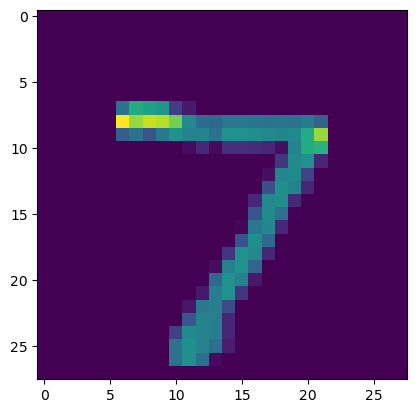

In [23]:
plt.imshow(x_test[0])

In [24]:
print(np.argmax(predictions[130]))

6


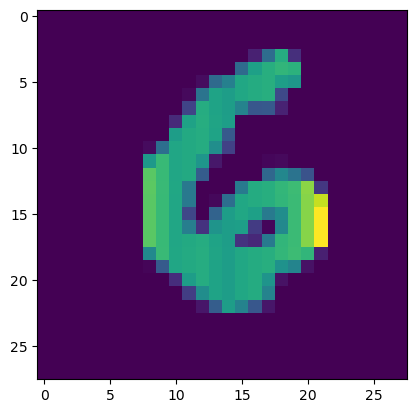

In [25]:
plt.imshow(x_test[130])

In [26]:
import cv2

img= cv2.imread('four-4.png')

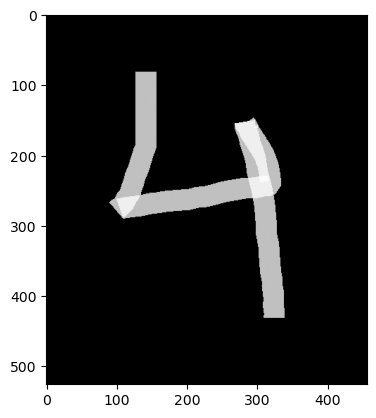

In [27]:
plt.imshow(img)

In [28]:
img.shape

(526, 456, 3)

In [29]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [30]:
gray.shape

(526, 456)

In [31]:
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)

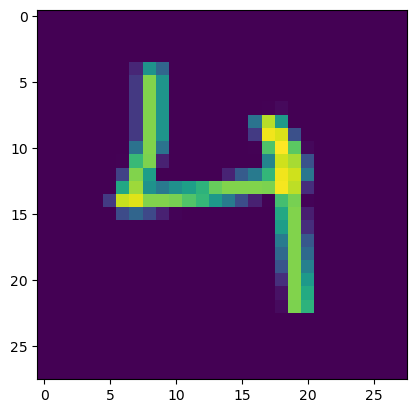

In [32]:
plt.imshow(resized)

In [33]:
resized.shape

(28, 28)

In [34]:
newimg = tf.keras.utils.normalize(resized, axis = 1)

In [35]:
newimg = np.array(newimg).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [36]:
newimg.shape

(1, 28, 28, 1)

In [37]:
predicions = model.predict(newimg)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


In [38]:
print (np.argmax(predicions))

4


# Testing With Other Numbers



In [39]:
img1= cv2.imread('zero-0.png')

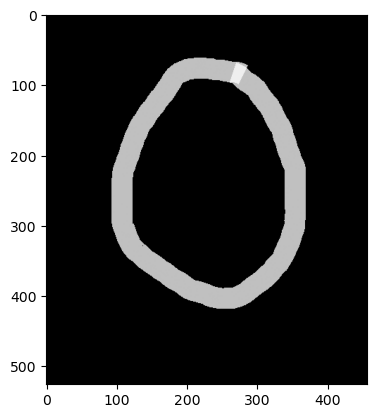

In [40]:
plt.imshow(img1)

In [41]:
img1.shape

(526, 456, 3)

In [42]:
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

In [43]:
gray1.shape

(526, 456)

In [44]:
resized1 = cv2.resize(gray1, (28,28), interpolation = cv2.INTER_AREA)

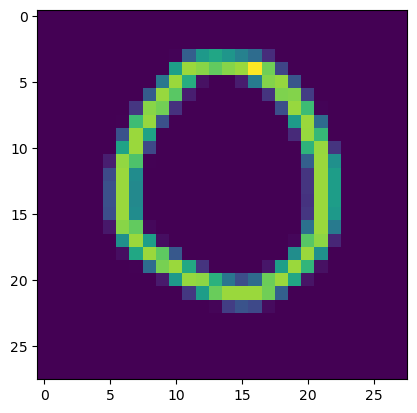

In [45]:
plt.imshow(resized1)

In [46]:
resized1.shape

(28, 28)

In [47]:
newimg1 = tf.keras.utils.normalize(resized1, axis = 1)

In [48]:
newimg1 = np.array(newimg1).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [49]:
newimg1.shape

(1, 28, 28, 1)

In [50]:
predicions = model.predict(newimg1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


In [51]:
print (np.argmax(predicions))

0


# Trial

In [215]:
img2= cv2.imread('nine-9.png')

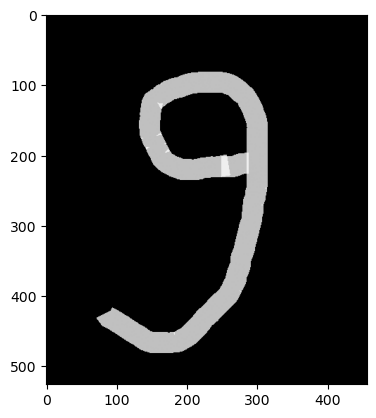

In [216]:
plt.imshow(img2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


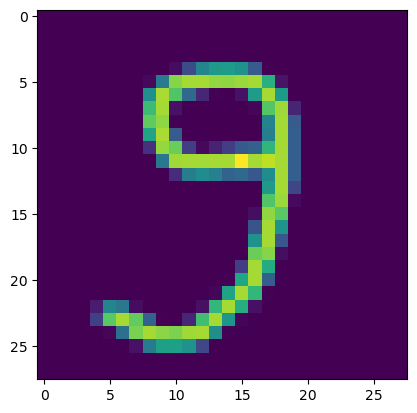

In [217]:
img2.shape
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
gray2.shape
resized2 = cv2.resize(gray2, (28,28), interpolation = cv2.INTER_AREA)
plt.imshow(resized2)
resized2.shape
newimg2 = tf.keras.utils.normalize(resized2, axis = 1)
newimg2 = np.array(newimg2).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
newimg2.shape
predicions = model.predict(newimg2)

In [218]:
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

In [219]:
gray2.shape

(526, 456)

In [ ]:
resized2 = cv2.resize(gray2, (28,28), interpolation = cv2.INTER_AREA)

In [ ]:
plt.imshow(resized2)

In [ ]:
resized2.shape

In [ ]:
newimg2 = tf.keras.utils.normalize(resized2, axis = 1)

In [ ]:
newimg2 = np.array(newimg2).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [ ]:
newimg2.shape

In [ ]:
predicions = model.predict(newimg2)

In [220]:
print (np.argmax(predicions))

9


In [266]:
from PIL import ImageGrab
im=ImageGrab.grab(bbox=(105,275,850,975))                                   

In [267]:
im.save("H:/image/"+"im.png")

In [268]:
img3= cv2.imread('H:/image/im.png')

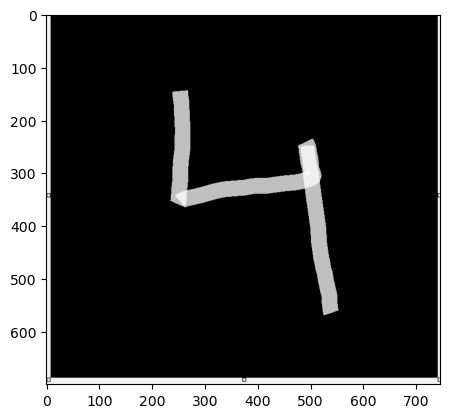

In [269]:
plt.imshow(img3)

In [270]:
img3.shape

(700, 745, 3)

In [271]:
gray3 = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)

In [272]:
gray3.shape

(700, 745)

In [273]:
resized3 = cv2.resize(gray3, (28,28), interpolation = cv2.INTER_AREA)

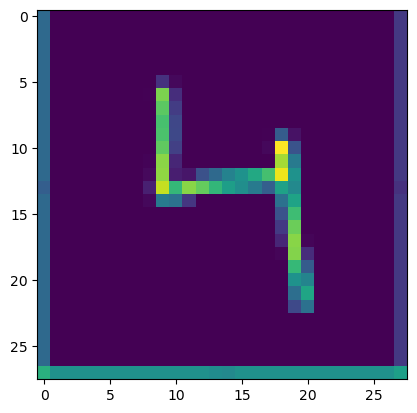

In [274]:
plt.imshow(resized3)

In [275]:
resized3.shape

(28, 28)

In [276]:
newimg3 = tf.keras.utils.normalize(resized3, axis = 1)

In [277]:
newimg3 = np.array(newimg3).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [278]:
newimg3.shape

(1, 28, 28, 1)

In [279]:
predicions = model.predict(newimg3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


In [280]:
print (np.argmax(predicions))

4
